In [22]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from itertools import product
from tqdm.auto import tqdm
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def read_dataset_by_name(index: int, mode: str):
    name = "DT_csv/" + str(index).zfill(2) + "_" + mode + ".csv"
    df = pd.read_csv(name)
    
    y = df['y'].to_numpy()
    X = df.drop('y', 1).to_numpy()
    
    return X, y

In [25]:
def get_dataset_by_index(index: int):
    X_train, y_train = read_dataset_by_name(index, 'train')
    X_test, y_test = read_dataset_by_name(index, 'test')
    
    return X_train, y_train, X_test, y_test

In [37]:
depths = [i for i in range(1, 21)]
criterions = ["gini", "entropy"]
splitters = ["best", "random"]

hparams = list(product(depths, criterions, splitters))

In [38]:
hparams[0]

(1, 'gini', 'best')

In [43]:
def grid_search_by_index(index: int, hparams: tuple):
    X_train, y_train, X_test, y_test = get_dataset_by_index(index)
    
    best_acc = -1
    best_hparams = None

    for params in tqdm(hparams):
        model = tree.DecisionTreeClassifier(
            criterion=params[1], splitter=params[2], 
            max_depth=params[0])

        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)

        acc = accuracy_score(y_test, y_hat)

        if acc > best_acc:
            best_acc = acc
            best_hparams = params
            
    return best_hparams

In [47]:
min_depth = (100, )
min_depth_id = None
max_depth = (-1, )
max_depth_id = None

for idx in range(1, 22):
    params = grid_search_by_index(idx, hparams)
        
    if params[0] < min_depth[0]:
        min_depth = params
        min_depth_id = idx
        
    if params[0] > max_depth[0]:
        max_depth = params
        max_depth_id = idx        
        
print(f'Biggest DT index: {max_depth_id}, params: {max_depth[0]}, {max_depth[1]}, {max_depth[2]}')

print(f'Shortest DT index: {min_depth_id}, params: {min_depth[0]}, {min_depth[1]}, {min_depth[2]}')


Biggest DT index: 2, params: 9, entropy, best
Shortest DT index: 3, params: 1, gini, best


In [51]:
def accuracy_from_depth(index: int, hparams: tuple):
    X_train, y_train, X_test, y_test = get_dataset_by_index(index)
    
    train_accs = list()
    test_accs = list()

    for depth in tqdm(range(1, 21)):
        model = tree.DecisionTreeClassifier(
            criterion=hparams[1], splitter=hparams[2], max_depth=depth)

        model.fit(X_train, y_train)
        
        y_hat = model.predict(X_train)
        train_accs.append(accuracy_score(y_train, y_hat))
        
        y_hat = model.predict(X_test)
        test_accs.append(accuracy_score(y_test, y_hat))
        
    return train_accs, test_accs

In [72]:
def plot_acc_for_depth(depth: tuple, depth_id: int):
    train_scores,  test_scores = accuracy_from_depth(depth_id, depth)
    
    plt.title("Dataset #" + str(depth_id))
    plt.plot(list(range(1, 21)), train_scores, color="orange", label="train")
    plt.plot(list(range(1, 21)), test_scores, color="blue", label="test")
    plt.grid(linestyle='--')
    plt.xlabel("Depth")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

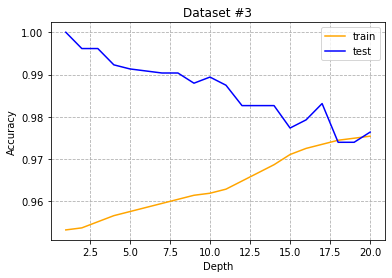

In [73]:
plot_acc_for_depth(min_depth, min_depth_id)

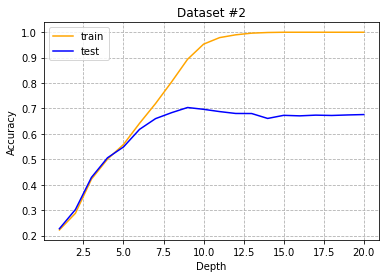

In [74]:
plot_acc_for_depth(max_depth, max_depth_id)